# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [11]:
%config InlineBackend.figure_format = 'svg'

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list 

In [13]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | raiganj
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | bichena
Processing Record 12 of Set 1 | bull savanna
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | jiangyou
Processing Record 16 of Set 1 | mukhen
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,33.03,100,100,9.22,US,1704672767
1,kruisfontein,-34.0033,24.7314,63.88,87,100,6.71,ZA,1704672813
2,ponta do sol,32.6667,-17.1000,70.00,84,100,5.55,PT,1704672813
3,puerto ayora,-0.7393,-90.3518,78.55,93,100,5.01,EC,1704672813
4,saint-philippe,-21.3585,55.7679,78.39,83,51,7.52,RE,1704672813


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,33.03,100,100,9.22,US,1704672767
1,kruisfontein,-34.0033,24.7314,63.88,87,100,6.71,ZA,1704672813
2,ponta do sol,32.6667,-17.1000,70.00,84,100,5.55,PT,1704672813
3,puerto ayora,-0.7393,-90.3518,78.55,93,100,5.01,EC,1704672813
4,saint-philippe,-21.3585,55.7679,78.39,83,51,7.52,RE,1704672813


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

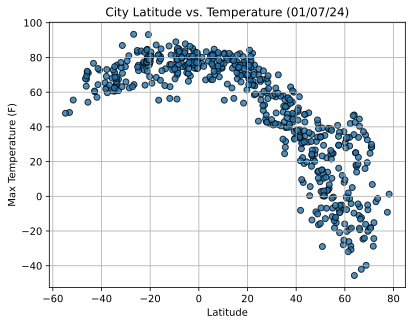

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

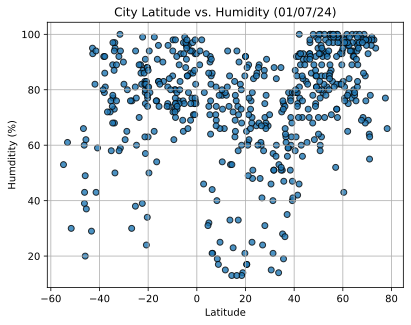

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humditity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

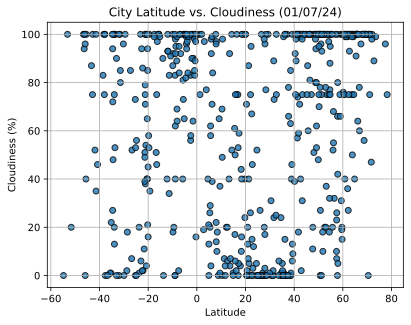

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

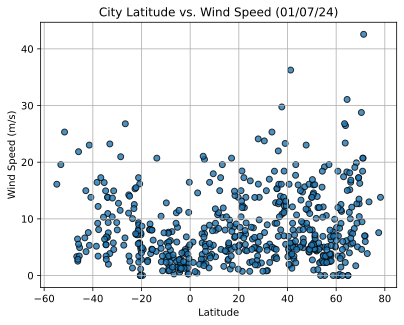

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, annotation_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue**2}")
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    
    # Plot the regression line with the x-values and the calculated y-values
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the linear equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, annotation_coordinates, fontsize=15, color="red")
    
    # Set the x and y labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,33.03,100,100,9.22,US,1704672767
2,ponta do sol,32.6667,-17.1000,70.00,84,100,5.55,PT,1704672813
5,hilo,19.7297,-155.0900,78.53,85,40,13.80,US,1704672814
6,butaritari,3.0707,172.7902,83.30,79,97,14.58,KI,1704672814
7,raiganj,25.6167,88.1167,58.78,89,0,6.44,IN,1704672814


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kruisfontein,-34.0033,24.7314,63.88,87,100,6.71,ZA,1704672813
3,puerto ayora,-0.7393,-90.3518,78.55,93,100,5.01,EC,1704672813
4,saint-philippe,-21.3585,55.7679,78.39,83,51,7.52,RE,1704672813
9,kaitangata,-46.2817,169.8464,63.46,60,94,6.44,NZ,1704672815
12,mar del plata,-38.0023,-57.5575,69.10,79,75,9.22,AR,1704672796


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7236877314332301


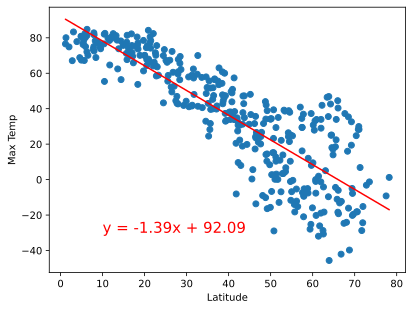

In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (10, -30))

The r-value is: 0.29623570098869567


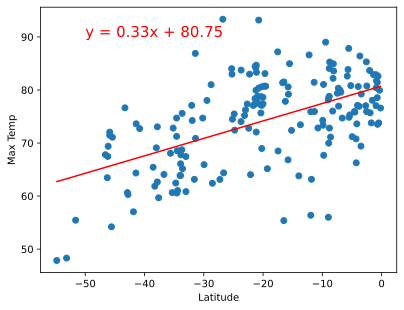

In [36]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (-50, 90))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21626015706202267


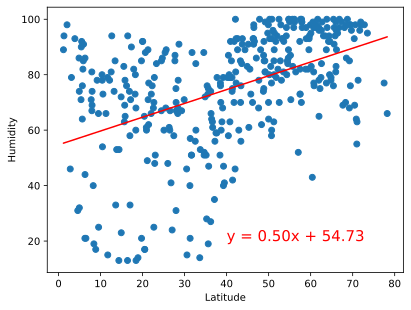

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (40, 20))

The r-value is: 0.13817581578503924


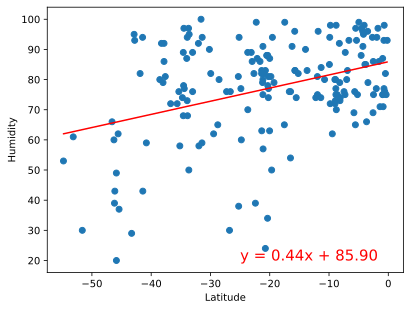

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-25, 20))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18017723123982843


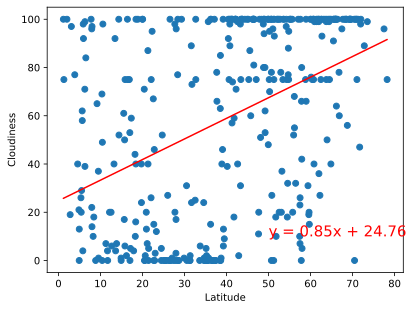

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (50, 10))

The r-value is: 0.05487248863208401


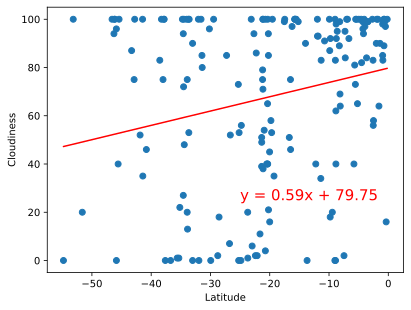

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-25, 25))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018768499671293685


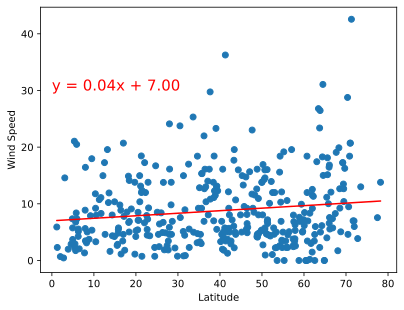

In [54]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0, 30))

The r-value is: 0.20551468334173015


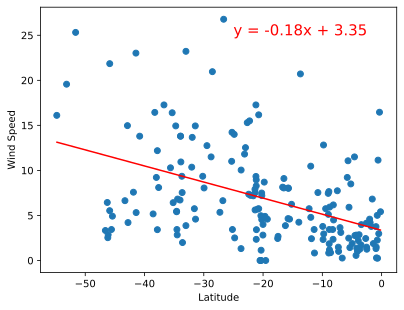

In [59]:
# Sourthern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-25, 25))